# Regression

## Dataset:

https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge


Welcome to the House Price Prediction Challenge, you will test your regression skills by designing an algorithm to accurately predict the house prices in India. Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such. This dataset has been collected across various property aggregators across India. In this competition, provided the 12 influencing factors your role as a data scientist is to predict the prices as accurately as possible.

Also, in this competition, you will get a lot of room for feature engineering and mastering advanced regression techniques such as Random Forest, Deep Neural Nets, and various other ensembling techniques.

- POSTED_BY:	Category marking who has listed the property

- UNDER_CONSTRUCTION:	Under Construction or Not

- RERA:	Rera approved or Not

- BHK_NO:	Number of Rooms

- BHKORRK:	Type of property

- SQUARE_FT:	Total area of the house in square feet

- READYTOMOVE:	Category marking Ready to move or Not

- RESALE:	Category marking Resale or not

- ADDRESS:	Address of the property

- LONGITUDE:	Longitude of the property

- LATITUDE:	Latitude of the property


## Linear Models:
$$\hat{y}(w, x) = w_0 + w_1 x_1 + \cdots + w_p x_p$$

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png" width=400 height=400 />

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('_data/house_prediction/train.csv')

In [ ]:
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [ ]:
data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


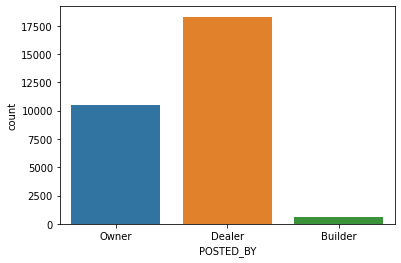

In [ ]:
sns.countplot(x='POSTED_BY', data=data);

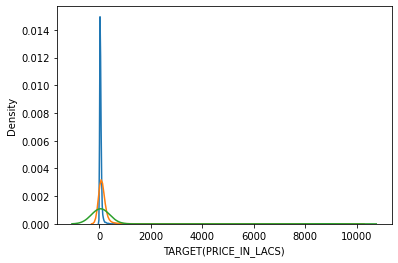

In [ ]:
sns.kdeplot(data[(data['POSTED_BY'] == 'Owner') & (data['TARGET(PRICE_IN_LACS)']<10000)]['TARGET(PRICE_IN_LACS)']);
sns.kdeplot(data[(data['POSTED_BY'] == 'Dealer') & (data['TARGET(PRICE_IN_LACS)']<10000)]['TARGET(PRICE_IN_LACS)']);
sns.kdeplot(data[(data['POSTED_BY'] == 'Builder') & (data['TARGET(PRICE_IN_LACS)']<10000)]['TARGET(PRICE_IN_LACS)']);

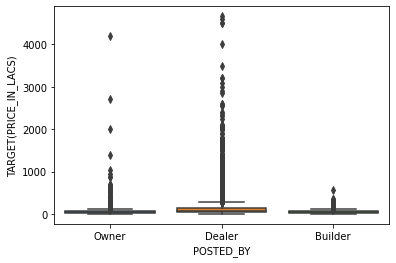

In [ ]:
sns.boxplot(x='POSTED_BY', y='TARGET(PRICE_IN_LACS)', data=data[data['TARGET(PRICE_IN_LACS)']<5000]);

In [ ]:
print(np.mean(data[(data['POSTED_BY'] == 'Owner')]['TARGET(PRICE_IN_LACS)']))
print(np.mean(data[(data['POSTED_BY'] == 'Dealer')]['TARGET(PRICE_IN_LACS)']))
print(np.mean(data[(data['POSTED_BY'] == 'Builder')]['TARGET(PRICE_IN_LACS)']))

60.6742636173847
186.77473456891366
245.7056270096463


In [ ]:
print(np.max(data[(data['POSTED_BY'] == 'Owner')]['TARGET(PRICE_IN_LACS)']))
print(np.max(data[(data['POSTED_BY'] == 'Dealer')]['TARGET(PRICE_IN_LACS)']))
print(np.max(data[(data['POSTED_BY'] == 'Builder')]['TARGET(PRICE_IN_LACS)']))

28000.0
30000.0
9700.0


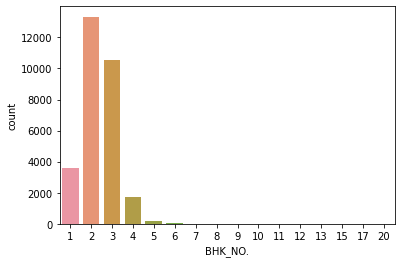

In [ ]:
sns.countplot(x='BHK_NO.', data=data);

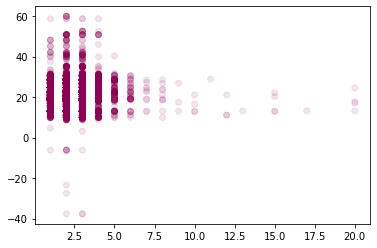

In [ ]:
plt.scatter(data['BHK_NO.'], data['LONGITUDE'], c=data['TARGET(PRICE_IN_LACS)'],
            cmap=plt.cm.PiYG, alpha=0.1);

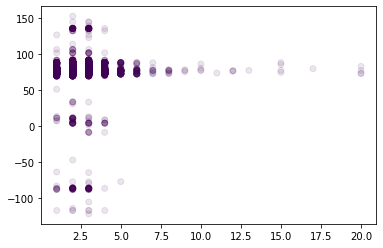

In [ ]:
plt.scatter(data['BHK_NO.'], data['LATITUDE'], c=data['TARGET(PRICE_IN_LACS)'], alpha=0.1);

In [ ]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [ ]:
data = data.drop(columns=['ADDRESS'])

In [ ]:
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,67.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = data.drop(columns='TARGET(PRICE_IN_LACS)')
y = data['TARGET(PRICE_IN_LACS)']

In [ ]:
LE = LabelEncoder()

In [ ]:
X['POSTED_BY'] = LE.fit_transform(X['POSTED_BY'])
X['BHK_OR_RK'] = LE.fit_transform(X['BHK_OR_RK'])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           29451 non-null  int64  
 1   UNDER_CONSTRUCTION  29451 non-null  int64  
 2   RERA                29451 non-null  int64  
 3   BHK_NO.             29451 non-null  int64  
 4   BHK_OR_RK           29451 non-null  int64  
 5   SQUARE_FT           29451 non-null  float64
 6   READY_TO_MOVE       29451 non-null  int64  
 7   RESALE              29451 non-null  int64  
 8   LONGITUDE           29451 non-null  float64
 9   LATITUDE            29451 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 2.2 MB


In [ ]:
X.describe()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000
mean,1.336695,0.179756,0.317918,2.392279,0.000815,1.980217e+04,0.820244,0.929578,21.300255,76.837695
std,0.515345,0.383991,0.465675,0.879091,0.028536,1.901335e+06,0.383991,0.255861,6.205306,10.557747
min,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248
25%,1.000000,0.000000,0.000000,2.000000,0.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100
50%,1.000000,0.000000,0.000000,2.000000,0.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137
75%,2.000000,0.000000,1.000000,3.000000,0.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740
max,2.000000,1.000000,1.000000,20.000000,1.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676


In [ ]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

In [ ]:
SS = StandardScaler()

In [ ]:
X[['SQUARE_FT']] = SS.fit_transform(X[['SQUARE_FT']])

In [ ]:
X[['LONGITUDE']] = MaxAbsScaler().fit_transform(X[['LONGITUDE']])
X[['LATITUDE']] = MaxAbsScaler().fit_transform(X[['LATITUDE']])

In [ ]:
X.describe()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000
mean,1.336695,0.179756,0.317918,2.392279,0.000815,-1.930101e-18,0.820244,0.929578,0.355520,0.502330
std,0.515345,0.383991,0.465675,0.879091,0.028536,1.000017e+00,0.383991,0.255861,0.103572,0.069022
min,0.000000,0.000000,0.000000,1.000000,0.000000,-1.041348e-02,0.000000,0.000000,-0.629464,-0.796019
25%,1.000000,0.000000,0.000000,2.000000,0.000000,-9.941684e-03,1.000000,1.000000,0.307992,0.482458
50%,1.000000,0.000000,0.000000,2.000000,0.000000,-9.797027e-03,1.000000,1.000000,0.346336,0.505510
75%,2.000000,0.000000,1.000000,3.000000,0.000000,-9.599462e-03,1.000000,1.000000,0.449001,0.508809
max,2.000000,1.000000,1.000000,20.000000,1.000000,1.338691e+02,1.000000,1.000000,1.000000,1.000000


## Simple Linear Model
$$min_{w} \|Xw - y\|^2_2$$

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20615, 10), (8836, 10), (20615,), (8836,))

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(X_test)

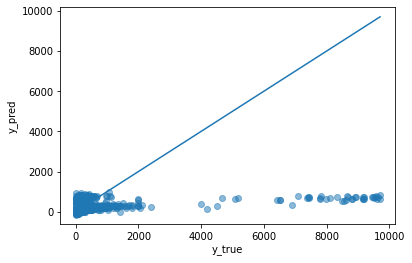

In [ ]:
x = np.linspace(0, max(np.max(y_test), np.max(y_pred)), 15000)
plt.plot(x, x)
plt.scatter(y_test, y_pred, alpha=0.5);
plt.xlabel('y_true');
plt.ylabel('y_pred');

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

for example :

$x_1$ and $x_2$ are inputs

the the outputs are as follows:

$1$, $x_1$, $x_2$, $x_1^2$, $x_2^2$, and $x_1 x_2$



In [ ]:
steps = [('poly feature', PolynomialFeatures(degree=2)),
         ('regressor', LinearRegression())]

LR = Pipeline(steps=steps)
LR.fit(X_train, y_train)

Pipeline(steps=[('poly feature', PolynomialFeatures()),
                ('regressor', LinearRegression())])

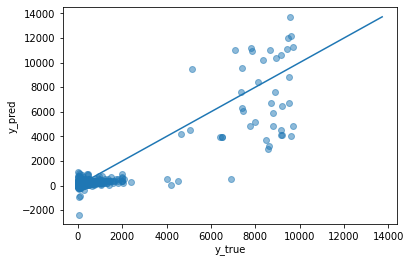

In [ ]:
y_pred = LR.predict(X_test)

x = np.linspace(0, max(np.max(y_test), np.max(y_pred)), 15000)
plt.plot(x, x)
plt.scatter(y_test, y_pred, alpha=0.5);
plt.xlabel('y_true');
plt.ylabel('y_pred');

In [ ]:
pd.get_dummies(data['POSTED_BY'])

,Builder,Dealer,Owner
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
29446,0,0,1
29447,0,0,1
29448,0,1,0
29449,0,0,1


## Ridge Model
$$min_{w} \|Xw - y\|^2_2 + \alpha \|w\|_2^2$$

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
steps = [('poly feature', PolynomialFeatures(degree=3)),
         ('regressor', Ridge(alpha=0.1))]

LR = Pipeline(steps=steps)
LR.fit(X_train, y_train)

Pipeline(steps=[('poly feature', PolynomialFeatures(degree=3)),
                ('regressor', Ridge(alpha=0.1))])

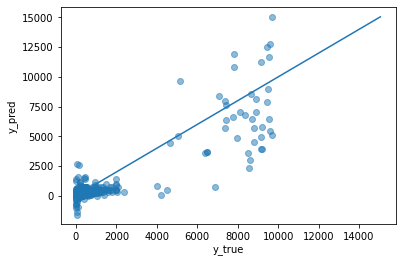

In [ ]:
y_pred = LR.predict(X_test)

x = np.linspace(0, max(np.max(y_test), np.max(y_pred)), 15000)
plt.plot(x, x)
plt.scatter(y_test, y_pred, alpha=0.5);
plt.xlabel('y_true');
plt.ylabel('y_pred');

## Lasso Model
$$min_{w} \frac{1}{2 n_{Samples}} \|Xw - y\|^2_2 + \alpha \|w\|_1$$

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
steps = [('poly feature', PolynomialFeatures(degree=2)),
         ('regressor', Lasso(alpha=10))]

LR = Pipeline(steps=steps)
LR.fit(X_train, y_train)

Pipeline(steps=[('poly feature', PolynomialFeatures()),
                ('regressor', Lasso(alpha=10))])

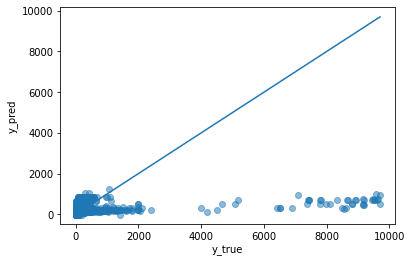

In [ ]:
y_pred = LR.predict(X_test)

x = np.linspace(0, max(np.max(y_test), np.max(y_pred)), 15000)
plt.plot(x, x)
plt.scatter(y_test, y_pred, alpha=0.5);
plt.xlabel('y_true');
plt.ylabel('y_pred');

## Elastic-Net Model
$$min_{w} \frac{1}{2 n_{Samples}} \|Xw - y\|^2_2 + \alpha \rho\|w\|_1 + \frac{\alpha(1-\rho)}{2}\|w\|_2^2$$

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
steps = [('poly feature', PolynomialFeatures(degree=2)),
         ('regressor', ElasticNet(alpha=1, l1_ratio=0.01))]

LR = Pipeline(steps=steps)
LR.fit(X_train, y_train)

Pipeline(steps=[('poly feature', PolynomialFeatures()),
                ('regressor', ElasticNet(alpha=1, l1_ratio=0.01))])

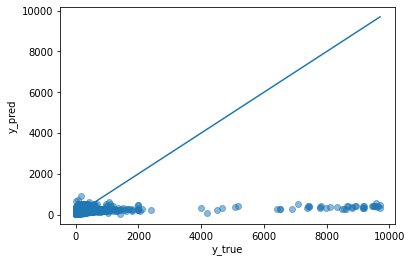

In [ ]:
y_pred = LR.predict(X_test)

x = np.linspace(0, max(np.max(y_test), np.max(y_pred)), 15000)
plt.plot(x, x)
plt.scatter(y_test, y_pred, alpha=0.5);
plt.xlabel('y_true');
plt.ylabel('y_pred');

# Metrics:

$$Max Error(y, \hat{y}) =  max(|y_i - \hat{y}_i|)$$

$$MAE(y, \hat{y}) = \frac{1}{n_{Samples}} \sum_{i=1}^{n_{Samples}}|y_i - \hat{y}_i|$$

$$MSE(y, \hat{y}) = \frac{1}{n_{Samples}} \sum_{i=1}^{n_{Samples}}(y_i - \hat{y}_i)^2$$

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

In [ ]:
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error, r2_score, ma

In [ ]:
steps1 = [('poly feature', PolynomialFeatures(degree=2)),
          ('regressor', LinearRegression())]

steps2 = [('poly feature', PolynomialFeatures(degree=3)),
          ('regressor', Ridge(alpha=0.1))]

steps3 = [('poly feature', PolynomialFeatures(degree=2)),
          ('regressor', Lasso(alpha=10))]

steps4 = [('poly feature', PolynomialFeatures(degree=2)),
          ('regressor', ElasticNet(alpha=1, l1_ratio=0.01))]


steps_list = [steps1, steps2, steps3, steps4]

for steps in steps_list:
    LR = Pipeline(steps=steps)
    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    
    print('max_abs err: {}, mean_sq err: {}, mean_abs err: {}, R^2 err: {}'.format(max_error(y_test, y_pred),
                                                                                   mean_squared_error(y_test, y_pred),
                                                                                   mean_absolute_error(y_test, y_pred),
                                                                                   r2_score(y_test, y_pred)))

max_abs err: 6344.634196574756, mean_sq err: 73051.39949365646, mean_abs err: 84.42819651533281, R^2 err: 0.7834082356841376
max_abs err: 6216.8420631448935, mean_sq err: 74796.09919647317, mean_abs err: 80.64040449305678, R^2 err: 0.7782353356513703
max_abs err: 9214.112620897542, mean_sq err: 310767.14375700965, mean_abs err: 126.62903260289335, R^2 err: 0.0785993913288835
max_abs err: 9377.426720402065, mean_sq err: 319120.5610967542, mean_abs err: 122.43990692896467, R^2 err: 0.05383215329891111




https://www.kaggle.com/datasets/denzilg/hdb-flat-prices-19902021-march